# Exercise Eight: Cultural Data
For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

Import your selected structured CSV data
Use Pandas to note any preliminary trends in the CSV as a dataframe
Use "group by" to break down at least two different subsets of data
Plot a comparison between the grouped data (this will be easiest over time)
Use one additional form of analysis or visualization from any we've tried so far 


## Stage One: Import Structured CSV Data (bonus: from multiple files)



In [2]:

import pandas as pd
import os
path = "happy/"
years = []
df_list = []

with os.scandir(path) as entries:
    for entry in entries:
        years.append(entry.name)
        temp_df = pd.read_csv(f'{path}{entry.name}')
        df_list.append(temp_df)
        
print(years[0])
print(df_list[0].head())

world-happiness-report-2021 (1).csv
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                   

## Stage Two: Explore and note differences in headings / datatypes over the years

In [3]:
[print(df.dtypes) for df in df_list]


Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

[None]

In [4]:
[print(df['Country name'].head()) for df in df_list]


0        Finland
1        Denmark
2    Switzerland
3        Iceland
4    Netherlands
Name: Country name, dtype: object


[None]

## Stage Three: Use Groupby to Explore (by Region)
Note this sample shows only one example, two are required for the exercise itself

In [5]:
close_region = df_list[0].groupby('Regional indicator')
close_region.get_group('Western Europe').head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
print(close_region['Ladder score'].mean())
print(close_region['Healthy life expectancy'].mean())

Regional indicator
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: Ladder score, dtype: float64
Regional indicator
Central and Eastern Europe            68.338412
Commonwealth of Independent States    65.009500
East Asia                             71.252167
Latin America and Caribbean           67.076050
Middle East and North Africa          65.609118
North America and ANZ                 72.325000
South Asia                            62.681000
Southeast Asia                        64.888444
Sub-Saharan Africa                    55.886472
Western Europe           

## Stage Four: Plot Grouped Data¶


Commonwealth
of
Independent
States


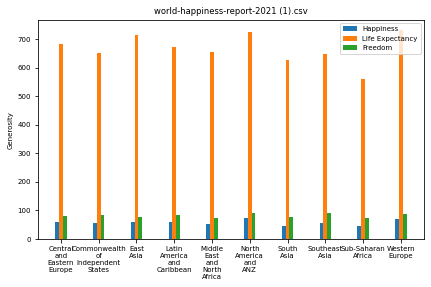

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 7})

regions = close_region['Regional indicator'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['Ladder score'].mean()*10, width, label='Happiness')
rects2 = ax.bar(x, close_region['Healthy life expectancy'].mean()*10, width, label='Life Expectancy')
rects3 = ax.bar(x + width, close_region['Freedom to make life choices'].mean()*100, width, label='Freedom')


ax.set_ylabel('Generosity')
ax.set_title(years[0])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()